# Pet Prediction

## Primer modelo implementado

In [1]:
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D

#### Ruta del dataset

In [2]:
# Ruta del dataset
data_train = './dataset_2/train'
data_test = './dataset_2/test'

#### Parametros

In [20]:
# ------Parametros----------
number_train_images = 2678
number_test_images = 1339
epoch = 50  # Epocas que se van a generar
batch_size = 36  # Numero de imagenes a procesar en cada paso
steps = number_train_images//batch_size  # Pasos por epoca
validation_steps = number_test_images//batch_size  # Pasos para data de test por epoca
length, heigth = 150, 150  # Dimensiones de las imagenes
classNumber = 3  # Numero de clases

#### Preparación y normalización de imagenes

In [21]:
#  ------ Preparación y normalización de imagenes --------

train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # Reescala los pixeles para una mejor precisión
    shear_range=0.3,  # Procesa e inclina algunas imagenes para potenciar el modelo
    zoom_range=0.3,  # Procesa y hace zoom inclina a algunas imagenes para potenciar el modelo
    horizontal_flip=True  # Invierte algunas imagenes
)

test_datagen = ImageDataGenerator(
    rescale=1. / 255,  # Para test solo se reescala
)

imgs_train = train_datagen.flow_from_directory(
    data_train,
    target_size=(heigth, length),
    batch_size=batch_size,
    class_mode='categorical'
)

print(len(imgs_train))

imgs_test = test_datagen.flow_from_directory(
    data_test,
    target_size=(heigth, length),
    batch_size=batch_size,
    class_mode='categorical'
)
print(len(imgs_test))

Found 5649 images belonging to 3 classes.
157
Found 1370 images belonging to 3 classes.
39


#### Creación del modelo

In [22]:
model = Sequential([
    Convolution2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Convolution2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Convolution2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Convolution2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(classNumber, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

#### Entrenamiento y exportar modelo

In [23]:
history = model.fit(
    imgs_train,
    steps_per_epoch=steps,
    epochs=epoch,
    validation_data=imgs_test,
    validation_steps=validation_steps
)

dir = './model_2/'
if not os.path.exists(dir):
    os.mkdir(dir)
model.save('./model_2/model.h5')
model.save_weights('./model_2/weights.h5')

Epoch 1/50
74/74 [==============================] - 72s 955ms/step - loss: 1.6023 - accuracy: 0.4426 - val_loss: 0.9953 - val_accuracy: 0.4339
Epoch 2/50
74/74 [==============================] - 69s 937ms/step - loss: 1.0046 - accuracy: 0.4464 - val_loss: 0.9293 - val_accuracy: 0.4317
Epoch 3/50
74/74 [==============================] - 70s 939ms/step - loss: 0.9757 - accuracy: 0.4825 - val_loss: 0.9830 - val_accuracy: 0.4520
Epoch 4/50
74/74 [==============================] - 70s 950ms/step - loss: 0.9617 - accuracy: 0.5223 - val_loss: 0.9561 - val_accuracy: 0.5511
Epoch 5/50
74/74 [==============================] - 70s 940ms/step - loss: 0.9294 - accuracy: 0.5441 - val_loss: 0.9062 - val_accuracy: 0.5608
Epoch 6/50
74/74 [==============================] - 70s 942ms/step - loss: 0.8834 - accuracy: 0.6016 - val_loss: 0.8124 - val_accuracy: 0.6381
Epoch 7/50
74/74 [==============================] - 69s 933ms/step - loss: 0.8891 - accuracy: 0.5950 - val_loss: 0.7814 - val_accuracy: 0.6742

#### Estadistica del modelo

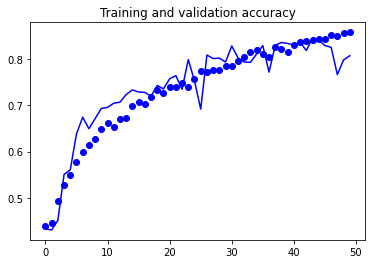

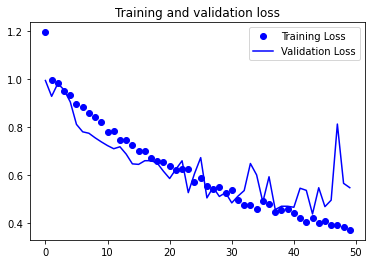

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Train vs Test Accuracy

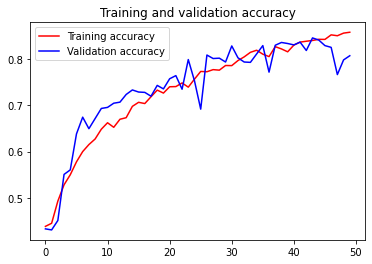

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()